In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats


# Load the data
mouse_metadata = pd.read_csv('/Users/muadrashid/Downloads/Starter_Code 2/Pymaceuticals/data/Mouse_metadata.csv')
study_results = pd.read_csv('/Users/muadrashid/Downloads/Starter_Code 2/Pymaceuticals/data/Study_results.csv')


In [4]:
# Merge the DataFrames
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')


In [6]:
# Display number of unique mice IDs
unique_mice = merged_df['Mouse ID'].nunique()
print(f'Number of unique mice IDs: {unique_mice}')

# Check for duplicate time points
duplicate_timepoints = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_timepoints)

# Remove duplicate time points
cleaned_df = merged_df.drop_duplicates(['Mouse ID', 'Timepoint'])
updated_unique_mice = cleaned_df['Mouse ID'].nunique()
print(f'Updated number of unique mice IDs: {updated_unique_mice}')


Number of unique mice IDs: 249
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female         

In [8]:
# Define a custom aggregation function for SEM
def calculate_sem(x):
    return stats.sem(x)

# Group by drug regimen and calculate summary statistics
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean', 'median', 'var', 'std', calculate_sem
])

# Rename the column for SEM
summary_stats.rename(columns={'calculate_sem': 'SEM'}, inplace=True)

print(summary_stats)


                   mean     median        var       std       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


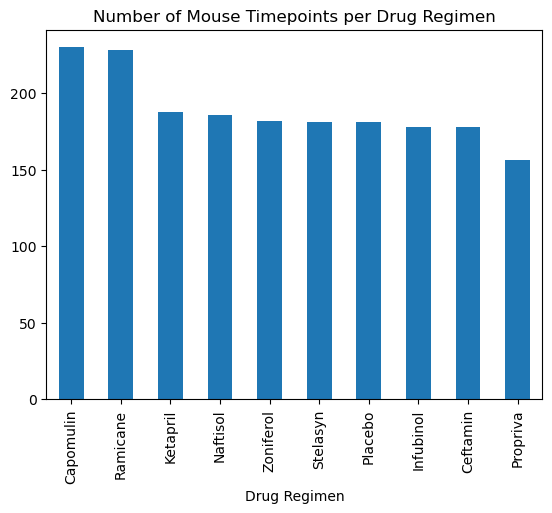

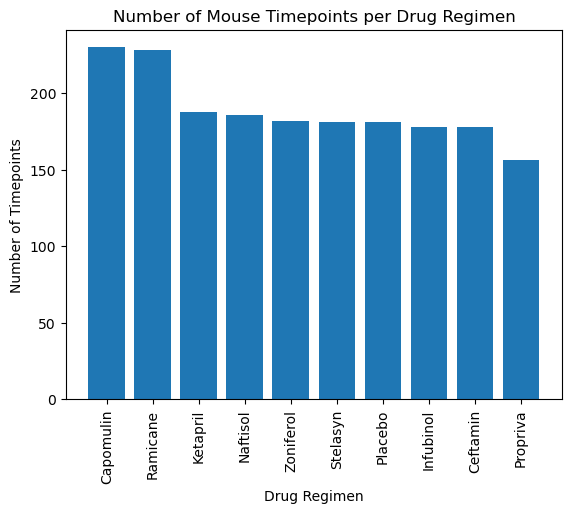

In [21]:
# Generate bar chart using Pandas
counts_pandas = cleaned_df['Drug Regimen'].value_counts()
counts_pandas.plot(kind='bar', title='Number of Mouse Timepoints per Drug Regimen')
plt.show()

# Generate bar chart using Matplotlib
counts_matplotlib = cleaned_df['Drug Regimen'].value_counts()
plt.bar(counts_matplotlib.index, counts_matplotlib.values)
plt.title('Number of Mouse Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)
plt.show()


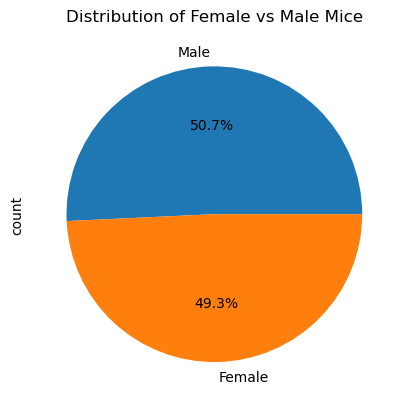

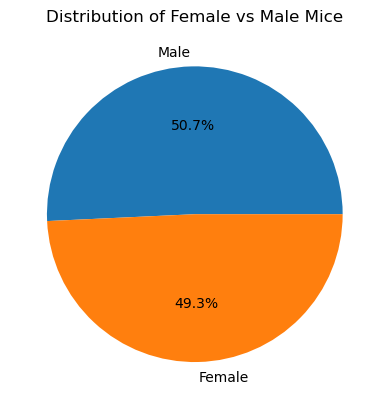

In [10]:
# Generate pie chart using Pandas
gender_counts_pandas = cleaned_df['Sex'].value_counts()
gender_counts_pandas.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice')
plt.show()

# Generate pie chart using Matplotlib
gender_counts_matplotlib = cleaned_df['Sex'].value_counts()
plt.pie(gender_counts_matplotlib, labels=gender_counts_matplotlib.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()


Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


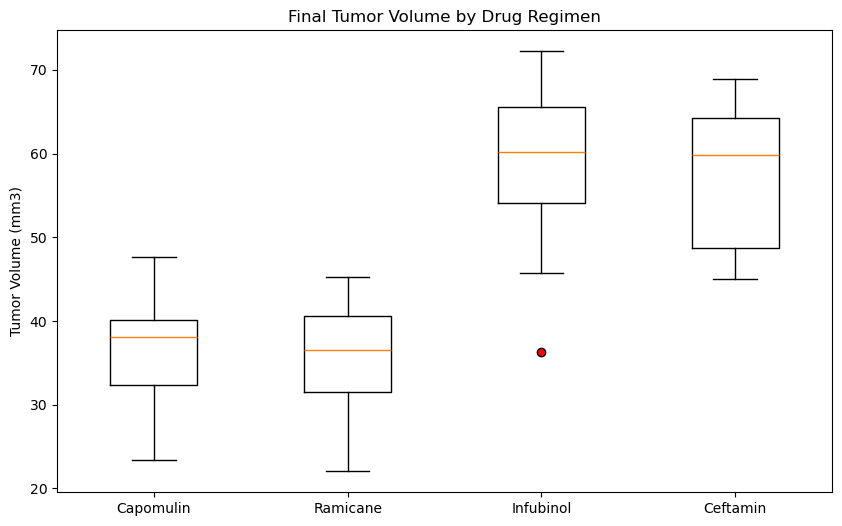

In [12]:
# Focus on specific treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = []

# Create a grouped DataFrame
last_timepoint_df = cleaned_df.groupby('Mouse ID').agg({'Timepoint': 'max'})
merged_last_timepoint_df = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'])

for treatment in treatments:
    treatment_data = merged_last_timepoint_df[merged_last_timepoint_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    final_tumor_volumes.append(treatment_data)
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - 1.5 * IQR
    upper_bound = quartiles[0.75] + 1.5 * IQR
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f'{treatment} outliers: {outliers}')

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(final_tumor_volumes, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


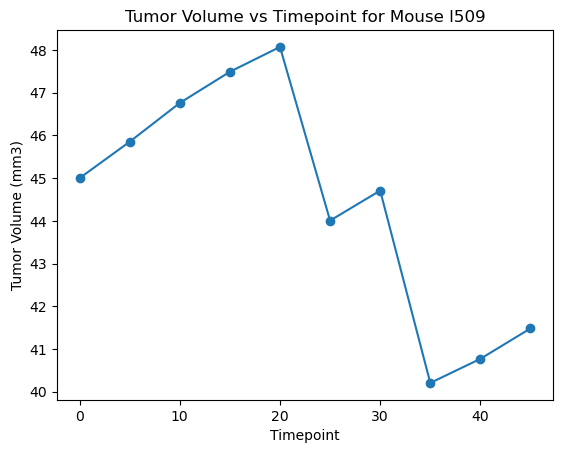

In [14]:
# Choose a single mouse from Capomulin regimen
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_df[capomulin_df['Mouse ID'] == 'l509']

plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs Timepoint for Mouse l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


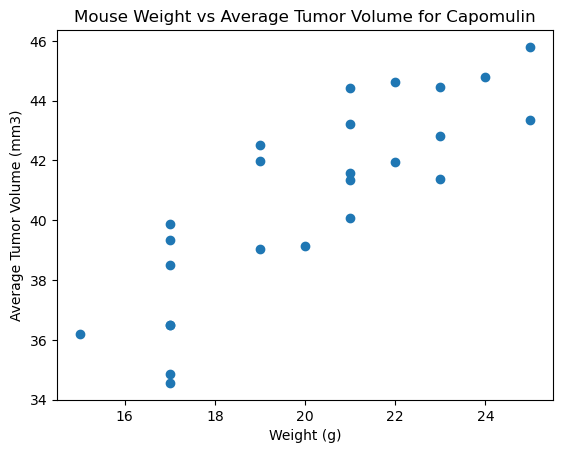

In [16]:
# Scatter plot of mouse weight vs average tumor volume
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumor_volume)
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


Correlation coefficient: 0.8419363424694722


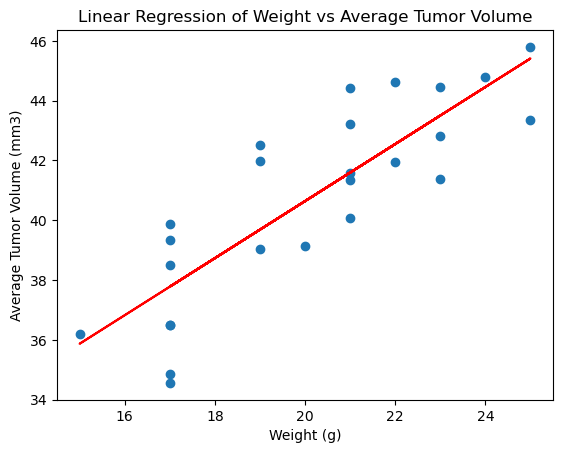

In [18]:
# Calculate correlation
correlation = mouse_weight.corr(avg_tumor_volume)
print(f'Correlation coefficient: {correlation}')

# Perform linear regression
from scipy.stats import linregress

regression = linregress(mouse_weight, avg_tumor_volume)
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regression.intercept + regression.slope * mouse_weight, color='red')
plt.title('Linear Regression of Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
